<a href="https://colab.research.google.com/github/solobala/STPY36/blob/main/STPY36_DZ3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Домашнее задание к лекции «Случайные события. Случайные величины»


Смоделировать игру против лотерейного автомата типа “777”. 

777: 200 руб.
999: 100 руб.
555: 50 руб.
333: 15 руб.
111: 10 руб.
*77: 5 руб.
**7: 3 руб.
*00: 2 руб.
**0: 1 руб.

Вопросы:

Выгодна ли игра игроку?
Сколько в среднем приобретает или теряет игрок за одну игру?

## Сгенерируем датасет

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def get_income(n):
  """
  Игрок платит 1 руб., после чего выпадает случайное целое число, 
  равномерно распределенное от 0 до 999. 
  При некоторых значениях числа игрок получает выигрыш.
  Важно: Функция возвращает сумму выигрыша за вычетом ставки игhока ( 1 руб.)
  """
  number = np.random.randint (0, k)  
  if number ==777:
    return 200
  elif number ==999:
    return 100
  elif number == 555:
    return 50
  elif number ==333:
    return 15
  elif number == 111:
    return 10
  elif number % 100 == 77:
    return 5
  elif number % 100 == 0:
    return 2
  elif (number % 10 == 0) and (number % 100 != 0):
    return 1
  elif (number  % 10 ==7) and (number % 100 != 77):
    return 3
  else: return 0

In [ ]:
m= int(input('Введите общий размер датасета для моделирования: '))
k = int(input('Введите максимальную сумму для определения случайной величины - начальной суммы для игры: '))
arr = np.empty(m, dtype = int) # Это массив выигрыша/проигрыша за игру
narr = np.empty(m, dtype = int) # Это массив начальных сумм для игры (=кол-ву ставок по 1 руб.)

for j in range(m):
  n = np.random.randint (1, k)
  #n=1000
  total = 0 
  for _ in range(n):
    total += get_income(n)
  
  arr[j] = total
  narr[j] = n

Введите общий размер датасета для моделирования: 10000
Введите максимальную сумму для определения случайной величины - начальной суммы для игры: 10000


In [ ]:
df = pd.DataFrame(narr, index=[i for i in range(m)],  columns=['n'])
df['total']= arr

df['income']=(df['total']-df['n'])/df['n']
df.head()

,n,total,income
0,9895,4479,-0.547347
1,5704,2784,-0.511921
2,1690,908,-0.462722
3,4697,2253,-0.520332
4,8355,3965,-0.525434


## Сохраним сгенерированный датасет

In [ ]:
import time

In [ ]:
%%time
pd.to_pickle(df, "./dummy.pkl")
df_unpiclked =pd.read_pickle("./dummy.pkl")
df_unpiclked.head()

CPU times: user 2.86 ms, sys: 1.01 ms, total: 3.87 ms
Wall time: 3.89 ms


,n,total,income
0,9895,4479,-0.547347
1,5704,2784,-0.511921
2,1690,908,-0.462722
3,4697,2253,-0.520332
4,8355,3965,-0.525434


In [ ]:
%%time
df.to_csv('/content/df.csv', index=False, sep=";")
df_loaded =pd.read_csv('/content/df.csv', sep =';')
df_loaded.head()

CPU times: user 37.7 ms, sys: 5.06 ms, total: 42.7 ms
Wall time: 43.8 ms


,n,total,income
0,9895,4479,-0.547347
1,5704,2784,-0.511921
2,1690,908,-0.462722
3,4697,2253,-0.520332
4,8355,3965,-0.525434


! С использованием picle выходит сильно быстрее

### Оценим, когда будут отрицательные или нулевые выигрыши, когда проигрыш и выигрыш будут максимальны 

In [ ]:
print(f"При размере датасета {m} и верхней границе диапазона для исходной суммы {k} В среднем за игру выигрыш (+)/проигрыш (-) составляет: ")
print(df['income'].mean())
print('Проигрыш отсутствует в ', len(df[df['income']>=0]), ' случаев')
print("Максимальный проигрыш: ", df['income'].min(), "максимальный выигрыш: ", df['income'].max())

При размере датасета 10000 и верхней границе диапазона для исходной суммы 10000 В среднем за игру выигрыш (+)/проигрыш (-) составляет: 
-0.5331121100875891
Проигрыш отсутствует в  14  случаев
Максимальный проигрыш:  -1.0 максимальный выигрыш:  2.4761904761904763


## Посмотрим на статистические характеристики income

In [ ]:
df.describe()

,n,total,income
count,10000.000000,10000.000000,10000.000000
mean,5050.152200,2359.789400,-0.533112
std,2870.332112,1353.531683,0.070969
min,1.000000,0.000000,-1.000000
25%,2596.500000,1201.750000,-0.561675
50%,5078.000000,2354.000000,-0.539918
75%,7525.000000,3510.000000,-0.512887
max,9995.000000,5447.000000,2.476190


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

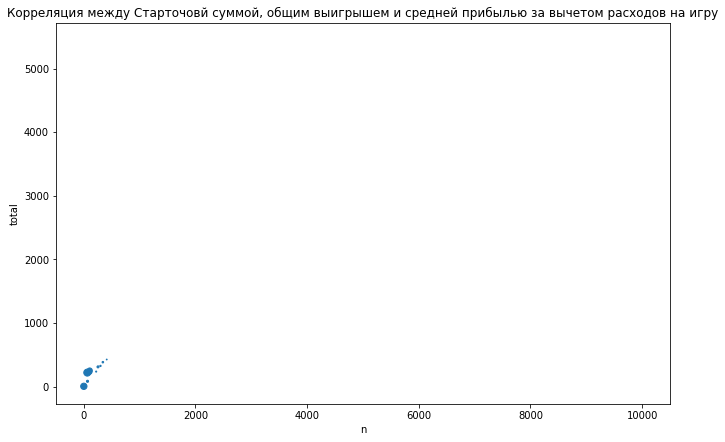

In [ ]:
df.plot(kind='scatter', 
        x='n', 
        y='total', 
        s=df['income']*20,
        title='Корреляция между стартовой суммой, общим выигрышем и средней прибылью за вычетом расходов на игру'
       )

## Построим гистограмму

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

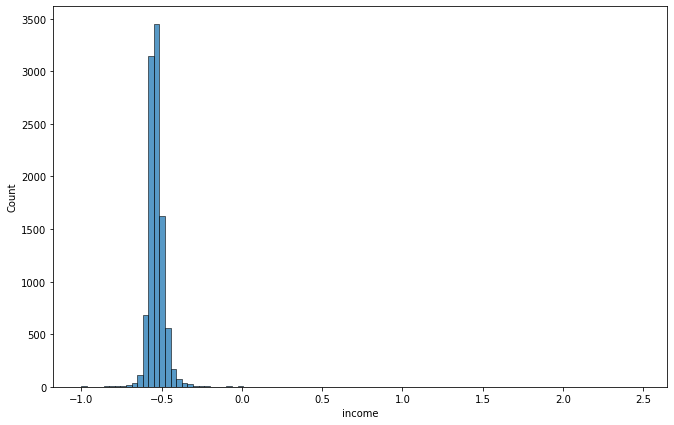

In [ ]:
sns.histplot(df['income'], bins = 100, fill=True)

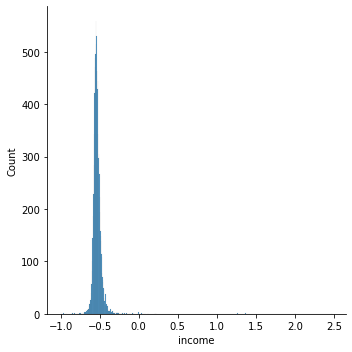

In [ ]:
sns.displot(df['income'])

# Дополнительное задание повышенной сложности.

Теоретически рассчитать средний выигрыш (проигрыш) и сравнить с результатами моделирования

Случайная величина - значение выпавшего числа
Случайное событие A - это выпадение выигрышного числа с определенным значением из заданного диапазона [0,N), 
Случайное событие B - это выпадение проигрышного числа с определенным значением из этого же диапазона, 
где N - стартовая сумма в наличии у игрока (и одновременно число ходов).

В опыте одинаково возможны N исходов, из которых M при водит к событию A(выигрышу), а K - к событию Б ( проигрышу)
Тогда вероятность выпадения выигрышного числа P(А) =M/N,  
вероятность проигрыша P(B) = (N-M)/N

Количество чисел 200, 100, 50, 15, 10 в выборке - по 1(всего 5)
Вероятность выпадения выигрышей 200, 100, 50, 15, 10руб. - одинакова и равна 

1/5 для каждого исхода P(A)|200,  P(A)|100,  P(A)|50,  P(A)|15 и  P(A)|10

Вероятность выпадения выигрыша 5 руб - для чисел, заканчивающихся на 77, зависит от N. В каждой сотне число 77 встречается 1 раз, значит, нужно посчитать к-во сотен: N/100 и вычесть 1 (число 777).

К-во таких чисел:N/100 - 1; 1000/100 -1 = 9
P(A)|*77 =1/(N/100  - 1)
1/(1000/100 - 1) = 1/9 

Вероятность выпадения выигрыша 3 руб - для чисел, заканчивающихся на 7, зависит от N. В каждом десятке цифра 7 встречается 1 раз, значит, нужно посчитать к-во десятков:N/10. и вычесть 1 (число 777) и 9 (к-во чисел,заканчивающихся на 77).

К-во таких чисел: N/10 -(N/100 - 1)-1 = N/10 - N/100; 1000/10 - 1 - 9 = 90
P(A)*7 = 1/(N/10 -1 - (N/100-1) = 1/(N/10-N/100) = 1/90

Вероятность выпадения выигрыша 2 руб - для чисел, кратных 100, звыисит от N. 

Их К-во: N/100; 1000/100 = 10

Вероятность выпадения выигрыша 1 руб - для чисел, кратных 10, зависит от N. 

Их К-во = N/10-N/100 (число чисел в промежутке, кратных 100, за вычетом количества чисел, кратных 10):
    1000/10 - 1000/100 = 90

Таким образом, в выборке из N у нас будет (5 + N/100 -1 + N/10-N/100 + N/100 + N/10 -N/100)=4+N/5 выигрышных чисел

в 1000 у нас 1+1+1+1+1+9+90+10+90 = 204 выигрышных числа. 
Тогда проигрышных будет 1000-214 =786.

Для выигрышных чисел: Средняя сумма выигрыша будет 
200 x 1  100 x 1 + 50 x 1 + 15 x 1+ 10 x 1 + 5 x 9 + 3 x 90 + 2 x 10 + 1 x 90 = 800

Для проигрышных чисел:  за каждую ставку выигрыш 0, поэтому 0 x 786 = 0.

Таким образом, 
средний выигрыш за 1000 ставок составит (800-1000)/1000=-0,2 руб, где 1000 -это начальные N рублей, из которых за каждую ставку игрок платит 1 рубль